# Final Project for CMPS240

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
#reading dataset
top10s = pd.read_table('top10s.csv', sep = ',', index_col = 0, engine = 'python')
top10s.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [61]:
#Cleaning Data
#Overview for checking missing values and datatypes:
top10s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [74]:
#Cleaning Data: Initial Observations
    #Beyonce's name causing random chars for 'e'
    #298: Beyonce song (originally said 43776, instead of 7/11)
    #121: add feature Nicki Minaj

#fix every instance of "BeyoncÃ©" in dataset
top10s['artist'].replace({"BeyoncÃ©":"Beyoncé"}, inplace = True)
#fix specific title error 
top10s['title'].replace({"43776":"7/11", "Beauty And A Beat":"Beauty And A Beat (feat. Nicki Minaj)"}, inplace = True)

print ("\nPOST-CORRECTIONS:\n", top10s.iloc[297], "\n\n", top10s.iloc[120])


POST-CORRECTIONS:
 title             7/11
artist         Beyoncé
top genre    dance pop
year              2015
bpm                136
nrgy                71
dnce                75
dB                  -5
live                13
val                 56
dur                214
acous                1
spch                13
pop                 72
Name: 298, dtype: object 

 title        Beauty And A Beat (feat. Nicki Minaj)
artist                               Justin Bieber
top genre                             canadian pop
year                                          2012
bpm                                            128
nrgy                                            84
dnce                                            60
dB                                              -5
live                                             7
val                                             53
dur                                            228
acous                                            0
spch              

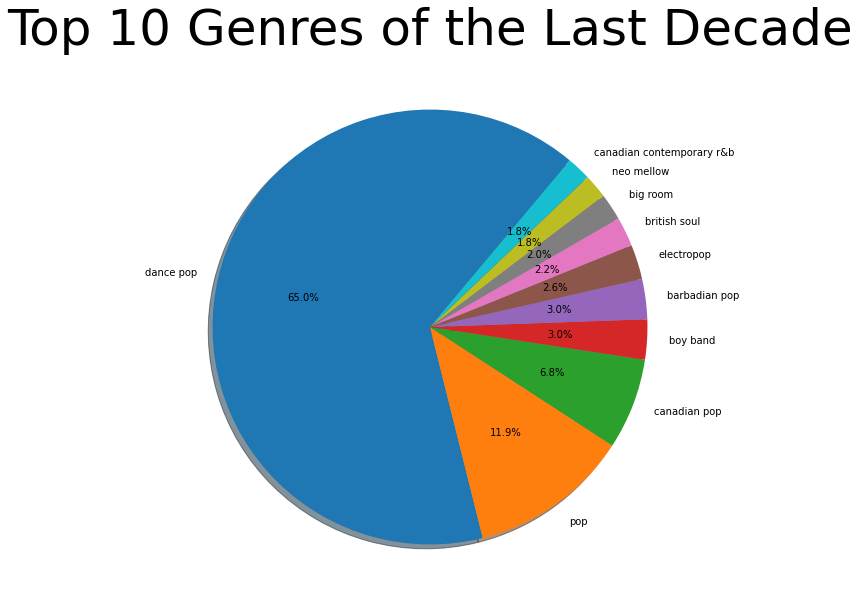

In [75]:
#Pie chart with percentages of genres over the 10 years
count = top10s['top genre'].value_counts().iloc[:10]
gen = top10s['top genre'].value_counts().iloc[:10].index
genre_pie = plt.pie(count, labels = gen,
autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('Top 10 Genres of the Last Decade', fontsize=50)
fig = plt.gcf()
fig.set_size_inches(10,10) 
plt.show()

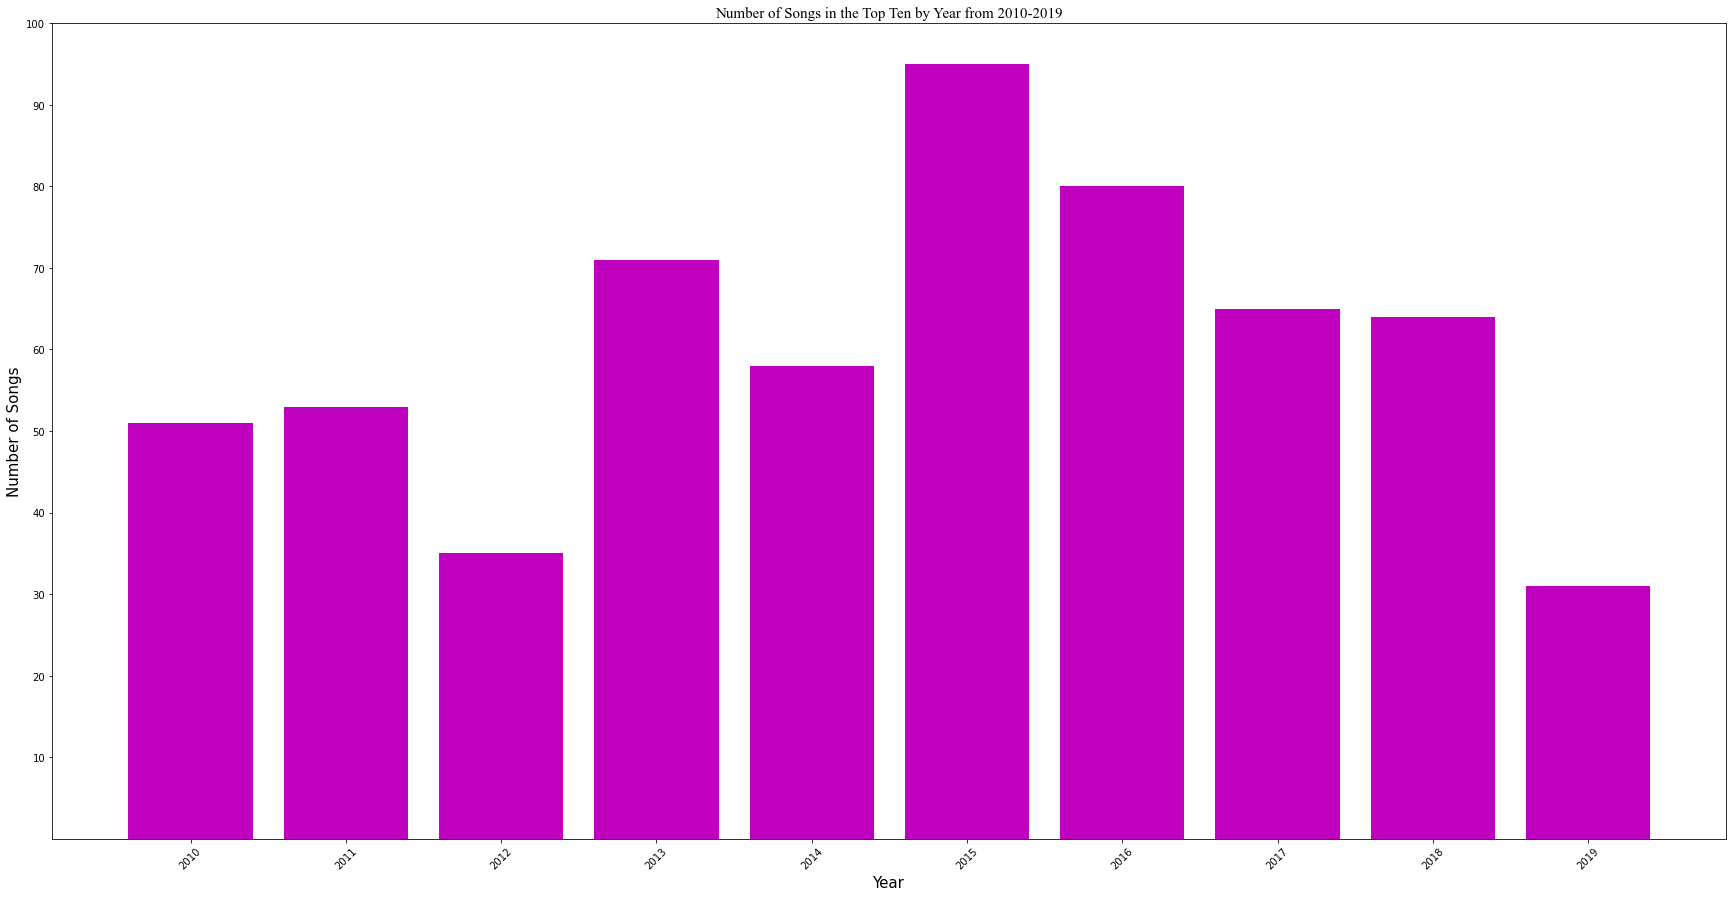

In [6]:
#Bar graph of how many songs reached top 10 per year
songs_per_year = top10s['year'].groupby(top10s['year']).count()
songs_per_year = songs_per_year.to_frame()
songs_per_year.columns = ['n']
songs_per_year.reset_index(inplace = True)
songs_per_year.columns = ['year','n']
plt.bar(songs_per_year.year, songs_per_year.n, color = 'm')
plt.xticks(songs_per_year.year, rotation = 45)
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Number of Songs in the Top Ten by Year from 2010-2019', fontsize=15, fontname='Times New Roman')
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of Songs", fontsize = 15)
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.show()

In [ ]:
#Visualization of bpm, nrgy, dnce, etc.
#scatter plot for bpm(and maybe others)? Look for clustering


In [ ]:
#Mention features, how many, genres more likely to have features, etc.


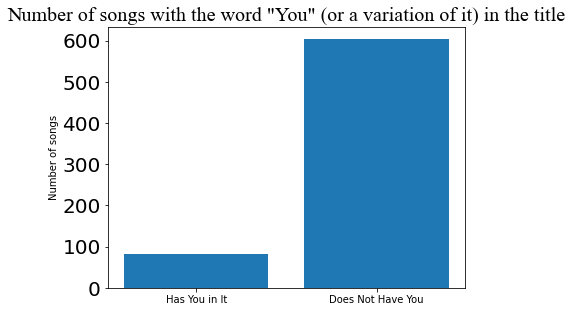

In [7]:
songs_with_you = []
for title in top10s.title:
    title = title.lower()
    if (title.find("you") != -1 or title.find(" u ") != -1): 
        songs_with_you.append(title)

you_df = pd.DataFrame( {'Has_you':['Has You in It','Does Not Have You'],
                        'n': [len(songs_with_you), len(top10s.title)]})  
you_df

plt.bar(you_df.Has_you, you_df.n)
plt.xticks(you_df.Has_you)
plt.yticks(fontsize = 20)
plt.title('Number of songs with the word "You" (or a variation of it) in the title', fontsize=20, fontname='Times New Roman')
plt.ylabel("Number of songs")
plt.show()

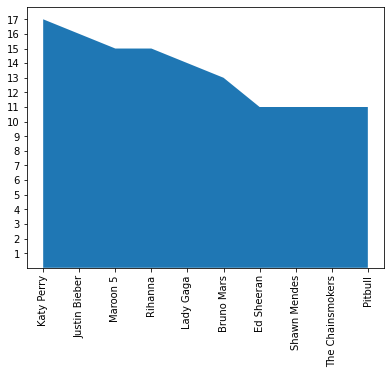

In [8]:
#Selecting top 10 artists with a song from the top 10s and visualizing how many each had
top10s_count = top10s['artist'].value_counts()[0:10]
top10s_count
artists_yr = top10s['artist'].value_counts().keys()[0:10]
plt.stackplot(artists_yr, top10s_count)
plt.xticks(artists_yr, rotation = 90)
plt.xticks(np.arange(0, len(artists_yr),1))
plt.yticks(np.arange(1, max(top10s_count)+1, 1))
plt.show()

In [148]:
#Looking at the first 5 years compared to the last 5 years, make graphs of genres (and maybe other variables) and see if theres a variation

